In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import colors
import matplotlib.ticker as mtick
import warnings
warnings.filterwarnings('ignore')


Bad key text.latex.preview in file C:\Users\NADEEM BAIG\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file C:\Users\NADEEM BAIG\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file C:\Users\NADEEM BAIG\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       # when a jpeg is saved, the default quality para

In [3]:
raw_data = pd.read_csv("C:\\Users\\NADEEM BAIG\\Downloads\\Stroke Dataset\\healthcare-dataset-stroke-data.csv")

In [4]:
raw_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
# Looking for missing data
missing_data=raw_data.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("")

id
False    5110
Name: id, dtype: int64

gender
False    5110
Name: gender, dtype: int64

age
False    5110
Name: age, dtype: int64

hypertension
False    5110
Name: hypertension, dtype: int64

heart_disease
False    5110
Name: heart_disease, dtype: int64

ever_married
False    5110
Name: ever_married, dtype: int64

work_type
False    5110
Name: work_type, dtype: int64

Residence_type
False    5110
Name: Residence_type, dtype: int64

avg_glucose_level
False    5110
Name: avg_glucose_level, dtype: int64

bmi
False    4909
True      201
Name: bmi, dtype: int64

smoking_status
False    5110
Name: smoking_status, dtype: int64

stroke
False    5110
Name: stroke, dtype: int64



In [6]:
raw_data.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [7]:
raw_data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [8]:
#drop the ID Column
raw_data.drop(columns = ['id'], inplace = True)

In [9]:
# Replace the missing values with mean of bmi attribute
raw_data['bmi'].fillna(np.round(raw_data['bmi'].mean(), 1), inplace = True)

In [10]:
raw_data.isnull().sum(axis = 0)

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [11]:
raw_data['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [12]:
raw_data = raw_data[raw_data['gender'] != 'Other']

In [13]:
raw_data['gender'].value_counts()

Female    2994
Male      2115
Name: gender, dtype: int64

In [14]:
# Create a new column for normalized age
raw_data['age_norm']=(raw_data['age']-raw_data['age'].min())/(raw_data['age'].max()-raw_data['age'].min())

# Create a new column for normalized avg glucose level
raw_data['avg_glucose_level_norm']=(raw_data['avg_glucose_level']-raw_data['avg_glucose_level'].min())/(raw_data['avg_glucose_level'].max()-raw_data['avg_glucose_level'].min())

# Create a new column for normalized bmi
raw_data['bmi_norm']=(raw_data['bmi']-raw_data['bmi'].min())/(raw_data['bmi'].max()-raw_data['bmi'].min())

In [15]:
raw_data['work_type'].value_counts()

Private          2924
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [16]:
raw_data['Residence_type'].value_counts()

Urban    2596
Rural    2513
Name: Residence_type, dtype: int64

In [17]:
raw_data['ever_married'].value_counts()

Yes    3353
No     1756
Name: ever_married, dtype: int64

In [18]:
raw_data['work_type'] = raw_data['work_type'].replace({'children' : 'Never_worked'})

In [19]:
raw_data['work_type'].value_counts()

Private          2924
Self-employed     819
Never_worked      709
Govt_job          657
Name: work_type, dtype: int64

In [20]:
raw_data.drop(columns = ['age','avg_glucose_level','bmi'], inplace=True)

In [21]:
raw_data.head()

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,stroke,age_norm,avg_glucose_level_norm,bmi_norm
0,Male,0,1,Yes,Private,Urban,formerly smoked,1,0.816895,0.801265,0.301260
1,Female,0,0,Yes,Self-employed,Rural,never smoked,1,0.743652,0.679023,0.213058
2,Male,0,1,Yes,Private,Rural,never smoked,1,0.975586,0.234512,0.254296
3,Female,0,0,Yes,Private,Urban,smokes,1,0.597168,0.536008,0.276060
4,Female,1,0,Yes,Self-employed,Rural,never smoked,1,0.963379,0.549349,0.156930


In [22]:
#set color for data visualization
sns.set(rc={"axes.facecolor":"#EAE0D5","figure.facecolor":"#EAE0D5", "grid.color":"#C6AC8F",
            "axes.edgecolor":"#C6AC8F", "axes.labelcolor":"#0A0908", "xtick.color":"#0A0908",
            "ytick.color":"#0A0908"})

palettes = ['#9B856A', '#475962', '#598392', '#124559', '#540B0E']
cmap = colors.ListedColormap(['#9B856A', '#124559', '#475962', '#598392'])

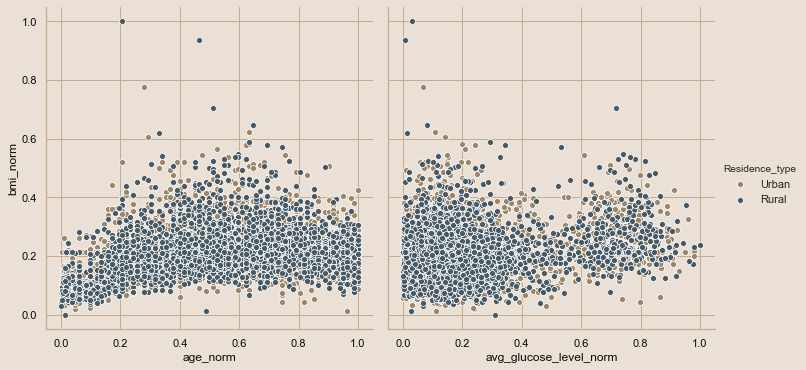

In [23]:
sns.pairplot(data=raw_data, y_vars='bmi_norm', x_vars=['age_norm', 'avg_glucose_level_norm'], hue='Residence_type',
             size=5, palette=['#9B856A', '#475962'])

<AxesSubplot:xlabel='gender', ylabel='bmi_norm'>

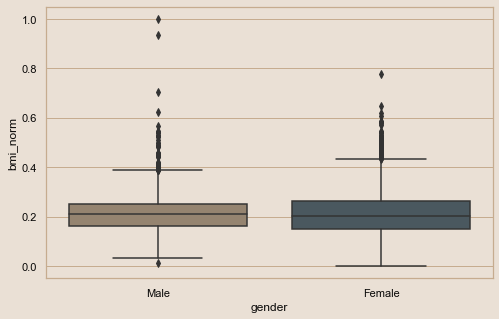

In [24]:
plt.figure(figsize=(8,5))
sns.boxplot(data=raw_data, x='gender', y='bmi_norm', palette=palettes)

In [29]:
#total number of male and female in dataset
value = raw_data['gender'].value_counts().sort_values().values

#percentage of male and female
percent = (raw_data['gender'].value_counts()*100/len(raw_data)).sort_values().values

idx = raw_data['gender'].value_counts().sort_values().index.values

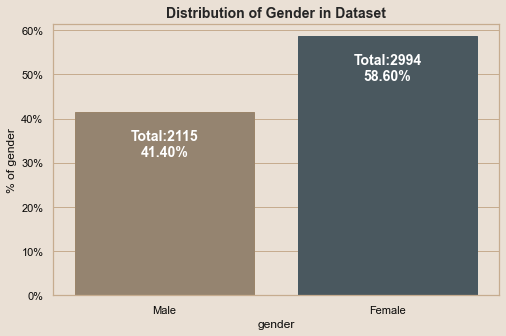

In [30]:
plt.figure(figsize=(8,5))
ax = sns.barplot(data=raw_data, x=idx, y=percent, palette=palettes, edgecolor=palettes)

#set y axis to percentage
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

ax.set_title('Distribution of Gender in Dataset', weight='bold', fontsize=14)
ax.set_xlabel('gender')
ax.set_ylabel('% of gender')

#place text in barplot
for i,v in enumerate(percent):
    #(x position, y position, text, ...)
    ax.text(i, v-10, 'Total:{}\n{:.2f}%'.format(value[i],v), horizontalalignment='center', weight='bold', color='white', fontsize=14)

<AxesSubplot:>

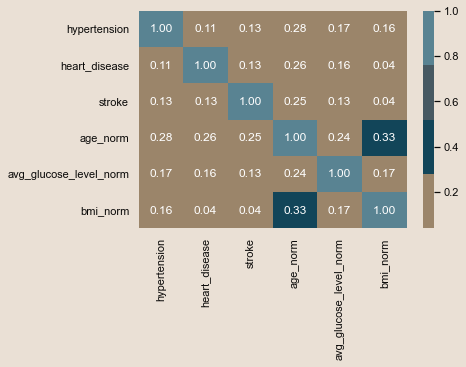

In [31]:
sns.heatmap(raw_data.corr(), annot=True, fmt='.2f', cmap=cmap)

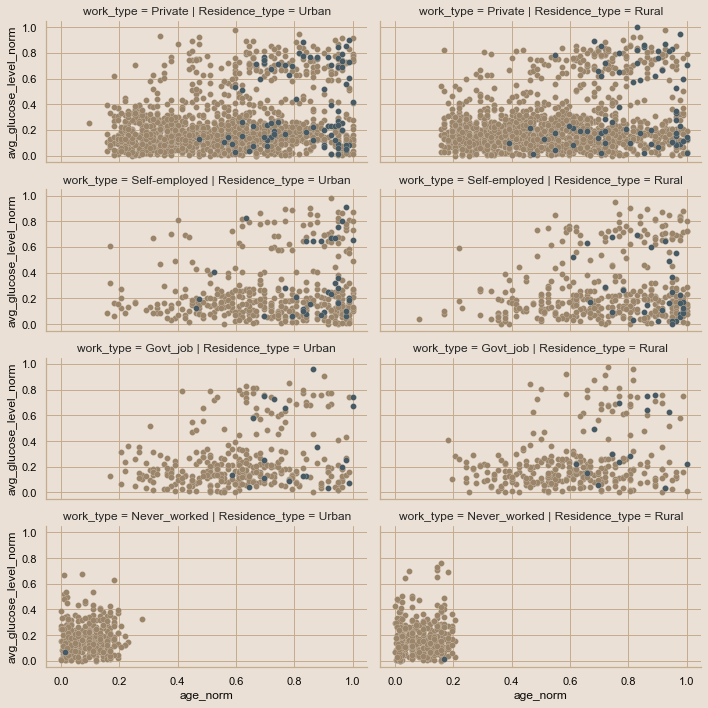

In [39]:
g = sns.FacetGrid(data=raw_data, row='work_type', col='Residence_type', hue='stroke',
                  size=2.5, aspect=2, palette=palettes)
g.map(plt.scatter, 'age_norm', 'avg_glucose_level_norm', edgecolor='#EAE0D5', lw=0.2)

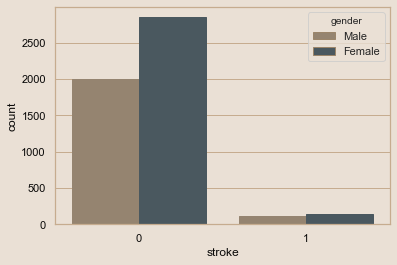

In [40]:
ax = sns.countplot(data=raw_data, x='stroke', hue='gender', palette=palettes, edgecolor=palettes)

for patch in ax.patches:
    clr = patch.get_facecolor()
    patch.set_edgecolor(clr)

In [44]:
smoking = raw_data['smoking_status'].value_counts()

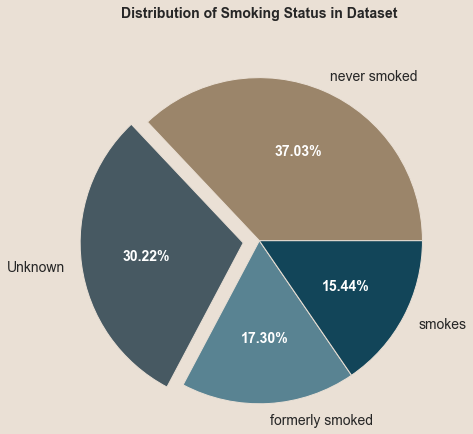

In [45]:
fig, ax = plt.subplots(figsize =(8, 5))
wedges, texts, autotexts = ax.pie(x=smoking, autopct="%.2f%%", labels=smoking.index, explode=[0,0.15,0,0], colors=palettes,
        radius=1.5, wedgeprops={ 'linewidth' : 1, 'edgecolor' : '#EAE0D5' }, textprops=dict(fontsize=14))

ax.set_title('Distribution of Smoking Status in Dataset', y=1.3, weight='bold', fontsize=14)

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_weight('bold')

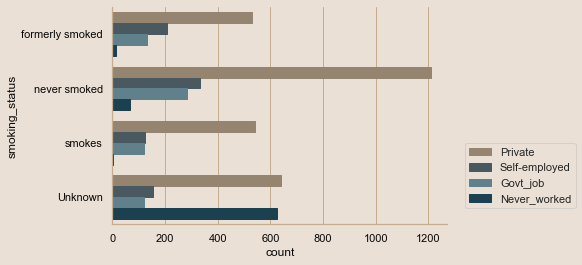

In [46]:
ax = sns.countplot(data=raw_data, hue='work_type', y='smoking_status', palette=palettes, orient='h')

#to change edgecolor
for patch in ax.patches:
    clr = patch.get_facecolor()
    patch.set_edgecolor(clr)

ax.legend(bbox_to_anchor=(1.4, 0.4))
sns.despine()

<AxesSubplot:xlabel='smoking_status', ylabel='age_norm'>

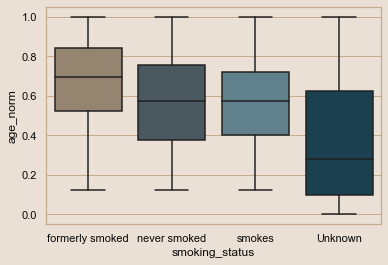

In [47]:
sns.boxplot(data=raw_data, x='smoking_status', y='age_norm', palette=palettes)

In [49]:
def smoke(text):
    if text == 'never smoked' or text == 'Unknown':
        return 'never smoked'
    else:
        return 'smoke'

In [51]:
raw_data['smoking_status'] = raw_data['smoking_status'].apply(smoke)

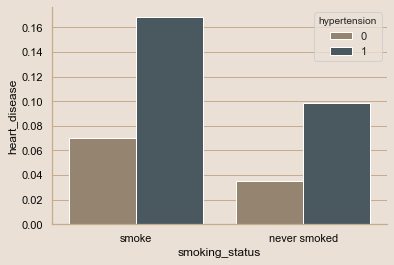

In [52]:
x = sns.barplot(data=raw_data, x='smoking_status', y='heart_disease', hue='hypertension', palette=palettes, ci=None)

#to change edgecolor
for patch in ax.patches:
    clr = patch.get_facecolor()
    patch.set_edgecolor(clr)

sns.despine()

Text(0.5, 1.1, 'Chance of Getting Stroke Based on Smoking Behavior')

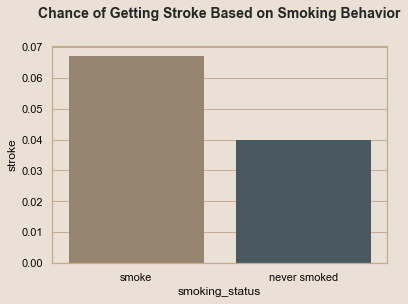

In [53]:
ax = sns.barplot(data=raw_data, x='smoking_status', y='stroke',
            palette=palettes, edgecolor=palettes, ci=None)

ax.set_title('Chance of Getting Stroke Based on Smoking Behavior', y=1.1, weight='bold', fontsize=14)

In [54]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
raw_data['Gender'] = le.fit_transform(raw_data['gender'])
raw_data['Gender'].value_counts()

0    2994
1    2115
Name: Gender, dtype: int64

In [55]:
raw_data.drop(columns = ['gender'],inplace=True)

In [56]:
raw_data['Married'] = le.fit_transform(raw_data['ever_married'])
raw_data['Married'].value_counts()

1    3353
0    1756
Name: Married, dtype: int64

In [57]:
raw_data.drop(columns = ['ever_married'],inplace=True)
raw_data.head()

,hypertension,heart_disease,work_type,Residence_type,smoking_status,stroke,age_norm,avg_glucose_level_norm,bmi_norm,Gender,Married
0,0,1,Private,Urban,smoke,1,0.816895,0.801265,0.301260,1,1
1,0,0,Self-employed,Rural,never smoked,1,0.743652,0.679023,0.213058,0,1
2,0,1,Private,Rural,never smoked,1,0.975586,0.234512,0.254296,1,1
3,0,0,Private,Urban,smoke,1,0.597168,0.536008,0.276060,0,1
4,1,0,Self-employed,Rural,never smoked,1,0.963379,0.549349,0.156930,0,1


In [58]:
raw_data['residence_type'] = le.fit_transform(raw_data['Residence_type'])
raw_data.head()

,hypertension,heart_disease,work_type,Residence_type,smoking_status,stroke,age_norm,avg_glucose_level_norm,bmi_norm,Gender,Married,residence_type
0,0,1,Private,Urban,smoke,1,0.816895,0.801265,0.301260,1,1,1
1,0,0,Self-employed,Rural,never smoked,1,0.743652,0.679023,0.213058,0,1,0
2,0,1,Private,Rural,never smoked,1,0.975586,0.234512,0.254296,1,1,0
3,0,0,Private,Urban,smoke,1,0.597168,0.536008,0.276060,0,1,1
4,1,0,Self-employed,Rural,never smoked,1,0.963379,0.549349,0.156930,0,1,0


In [59]:
raw_data.drop(columns = ['Residence_type'],inplace=True)

In [60]:
df_dummies = pd.get_dummies(raw_data['work_type'])
df_dummies.head()

,Govt_job,Never_worked,Private,Self-employed
0,0,0,1,0
1,0,0,0,1
2,0,0,1,0
3,0,0,1,0
4,0,0,0,1


In [61]:
data = pd.concat(objs = [raw_data, df_dummies], axis=1 )

In [62]:
data.drop(columns = ['work_type','Self-employed'], inplace=True)

In [64]:
data['Smoking_status'] = le.fit_transform(data['smoking_status'])
data['Smoking_status'].value_counts()

0    3436
1    1673
Name: Smoking_status, dtype: int64

In [66]:
data.drop(columns = ['smoking_status'],inplace=True)

In [67]:
data.head()

,hypertension,heart_disease,stroke,age_norm,avg_glucose_level_norm,bmi_norm,Gender,Married,residence_type,Govt_job,Never_worked,Private,Smoking_status
0,0,1,1,0.816895,0.801265,0.301260,1,1,1,0,0,1,1
1,0,0,1,0.743652,0.679023,0.213058,0,1,0,0,0,0,0
2,0,1,1,0.975586,0.234512,0.254296,1,1,0,0,0,1,0
3,0,0,1,0.597168,0.536008,0.276060,0,1,1,0,0,1,1
4,1,0,1,0.963379,0.549349,0.156930,0,1,0,0,0,0,0


In [68]:
shuffled_data = data.sample(frac=1).reset_index()
dataframe = pd.DataFrame(shuffled_data)
dataframe.head()

,index,hypertension,heart_disease,stroke,age_norm,avg_glucose_level_norm,bmi_norm,Gender,Married,residence_type,Govt_job,Never_worked,Private,Smoking_status
0,3559,0,0,0,0.719238,0.098744,0.223368,1,1,1,0,0,0,0
1,4773,0,0,0,0.890137,0.307959,0.229095,1,1,0,0,0,1,1
2,4853,0,0,0,0.169922,0.214569,0.171821,0,0,0,0,1,0,0
3,1979,0,0,0,0.536133,0.223063,0.202749,1,0,1,0,0,1,0
4,622,0,0,0,0.401855,0.065922,0.429553,0,1,1,0,0,1,0


In [69]:
dataframe.drop(columns=['index'],inplace=True)
dataframe.head()

,hypertension,heart_disease,stroke,age_norm,avg_glucose_level_norm,bmi_norm,Gender,Married,residence_type,Govt_job,Never_worked,Private,Smoking_status
0,0,0,0,0.719238,0.098744,0.223368,1,1,1,0,0,0,0
1,0,0,0,0.890137,0.307959,0.229095,1,1,0,0,0,1,1
2,0,0,0,0.169922,0.214569,0.171821,0,0,0,0,1,0,0
3,0,0,0,0.536133,0.223063,0.202749,1,0,1,0,0,1,0
4,0,0,0,0.401855,0.065922,0.429553,0,1,1,0,0,1,0


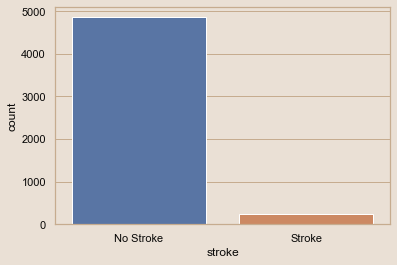

In [70]:
f = sns.countplot(dataframe['stroke'])
f.set_xticklabels(['No Stroke','Stroke'])
plt.show()

In [71]:
from collections import Counter
counter = Counter(dataframe['stroke'])
print(counter)

Counter({0: 4860, 1: 249})


In [72]:
X = dataframe.drop('stroke', axis=1)
y = dataframe['stroke']

In [73]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, f1_score

In [79]:
# define pipeline
model = RandomForestClassifier(max_depth=5, max_features=10, min_samples_leaf=20,
                       n_jobs=-1, random_state=42)
over = SMOTE(sampling_strategy={0:4400, 1:2800})
under = RandomUnderSampler(sampling_strategy={0:3000, 1:2800})
steps = [('over', over), ('under', under), ('model', model)]
pipeline = Pipeline(steps=steps)
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10 , n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1, error_score='raise')
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.824
